# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing.


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [38]:
# Import necessary functions

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

sns.set(font_scale = 1)

In [2]:
df = pd.read_csv('data/zillow_data.csv')

In [3]:
df.shape

(14723, 272)

# Step 2: Data Preprocessing

In [4]:
melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted = melted.dropna(subset=['value'])

In [5]:
melted

,RegionName,RegionID,SizeRank,City,State,Metro,CountyName,time,value
0,60657,84654,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,90668,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,91982,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,84616,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,93144,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,1338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
3901591,3293,59107,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
3901592,40404,75672,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0
3901593,81225,93733,14722,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0


In [6]:
melted = melted.rename(columns={'RegionName': 'ZipCode'})

In [7]:
melted = melted.drop('RegionID', axis=1)

In [8]:
melted

,ZipCode,SizeRank,City,State,Metro,CountyName,time,value
0,60657,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0
...,...,...,...,...,...,...,...,...
3901590,1338,14719,Ashfield,MA,Greenfield Town,Franklin,2018-04-01,209300.0
3901591,3293,14720,Woodstock,NH,Claremont,Grafton,2018-04-01,225800.0
3901592,40404,14721,Berea,KY,Richmond,Madison,2018-04-01,133400.0
3901593,81225,14722,Mount Crested Butte,CO,NaN,Gunnison,2018-04-01,664400.0


In [9]:
melted.set_index('time', inplace=True)

In [10]:
melted['ZipCode'] = melted['ZipCode'].map("{:05}".format)

In [11]:
melted

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,60657,1,Chicago,IL,Chicago,Cook,334200.0
1996-04-01,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,235700.0
1996-04-01,77494,3,Katy,TX,Houston,Harris,210400.0
1996-04-01,60614,4,Chicago,IL,Chicago,Cook,498100.0
1996-04-01,79936,5,El Paso,TX,El Paso,El Paso,77300.0
...,...,...,...,...,...,...,...
2018-04-01,01338,14719,Ashfield,MA,Greenfield Town,Franklin,209300.0
2018-04-01,03293,14720,Woodstock,NH,Claremont,Grafton,225800.0
2018-04-01,40404,14721,Berea,KY,Richmond,Madison,133400.0


# Step 3: EDA and Visualization

In [12]:
# font = {'family' : 'normal',
        # 'weight' : 'bold',
        # 'size'   : 22}

# plt.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [13]:
melted_states = melted.groupby('State').mean()
melted_states.reset_index(drop=False, inplace=True)

In [14]:
melted_states.sort_values(by='value', ascending=False).head(10)

,State,SizeRank,value
7,DC,2675.000000,487971.048218
4,CA,4994.285179,457429.433338
11,HI,6866.973086,456644.653920
31,NJ,7584.605578,325240.623919
19,MA,7838.689916,322503.757992
20,MD,7649.189295,264829.234655
34,NY,8758.210618,264731.711413
6,CT,7825.217742,260539.637858
5,CO,6627.960242,258393.456322
47,WA,6471.047953,246150.326746


In [15]:
import plotly.express as px

fig = px.choropleth(melted_states,
                    locations='State', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='value',
                    color_continuous_scale="Viridis_r",      
                    )
fig.update_layout(
      title_text = 'Mean Home Value by State, 1996 - 2018',
      title_font_family="Arial",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )
fig.show()

In [16]:
df_top_zip = melted[(melted['ZipCode'] == '80216') |
                    (melted['ZipCode'] == '94601') |
                    (melted['ZipCode'] == '48240') |
                    (melted['ZipCode'] == '94590')]

In [17]:
df_top_zip

,ZipCode,SizeRank,City,State,Metro,CountyName,value
time,,,,,,,
1996-04-01,94590,1240,Vallejo,CA,Vallejo,Solano,108200.0
1996-04-01,94601,1478,Oakland,CA,San Francisco,Alameda,114600.0
1996-04-01,48240,5831,Redford,MI,Detroit,Wayne,67800.0
1996-05-01,94590,1240,Vallejo,CA,Vallejo,Solano,107800.0
1996-05-01,94601,1478,Oakland,CA,San Francisco,Alameda,114500.0
...,...,...,...,...,...,...,...
2018-03-01,80216,7303,Denver,CO,Denver,Denver,263700.0
2018-04-01,94590,1240,Vallejo,CA,Vallejo,Solano,376100.0
2018-04-01,94601,1478,Oakland,CA,San Francisco,Alameda,566700.0


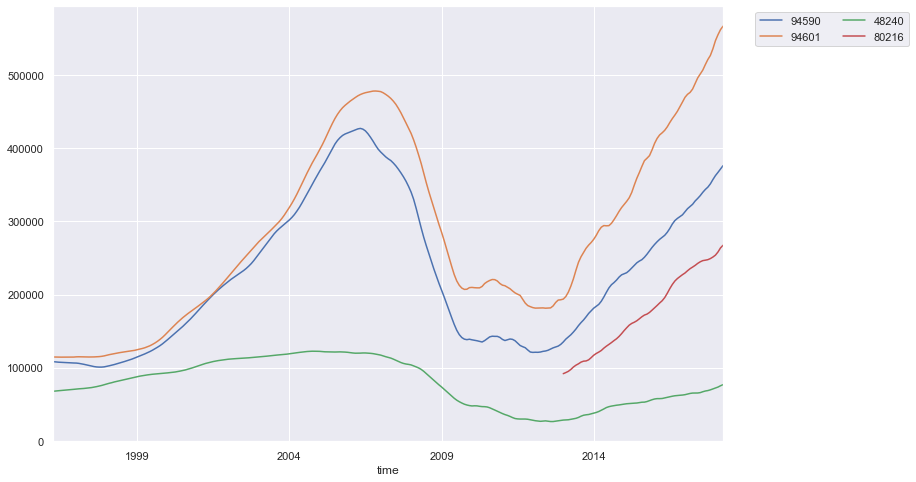

In [18]:
plt.figure(figsize=(12,8))
for zipcode in df_top_zip.ZipCode.unique():
    df_top_zip.loc[df_top_zip['ZipCode'] == zipcode].value.plot(label=zipcode)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
plt.show();

In [19]:
df_94590 = melted[melted['ZipCode'] == '94590']

In [22]:
df_94590 = df_94590['value']
df_94590

time
1996-04-01    108200.0
1996-05-01    107800.0
1996-06-01    107500.0
1996-07-01    107300.0
1996-08-01    107100.0
                ...   
2017-12-01    357100.0
2018-01-01    362500.0
2018-02-01    366900.0
2018-03-01    371600.0
2018-04-01    376100.0
Name: value, Length: 265, dtype: float64

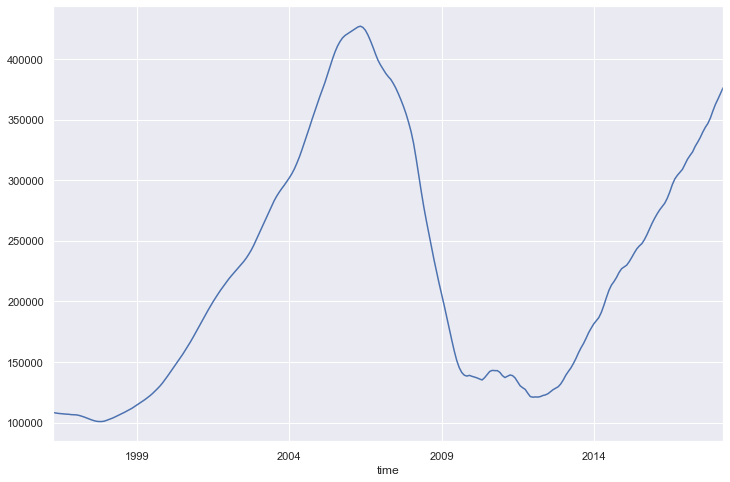

In [28]:
plt.figure(figsize=(12,8))
df_94590.plot()
plt.show()

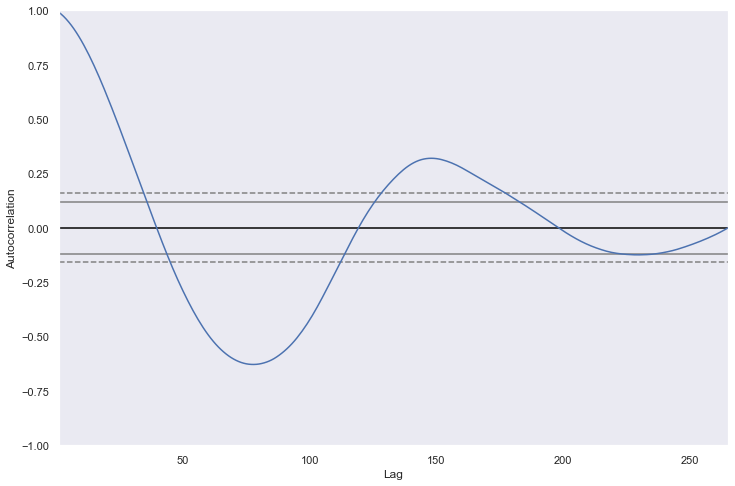

In [29]:
plt.figure(figsize=(12,8))
autocorrelation_plot(df_94590)
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(df_94590.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

AttributeError: 'Series' object has no attribute 'value'

In [95]:
df_time = df_10021["2013-4-1":"2018-4-1"].copy()

In [96]:
# Use this line to specify the rate of change you want to calculate
pct_return_periods = 12

# Create a column with the percentage increase and multiply by 100
df_time["percent_change"] = (df_time['value'].pct_change(periods=pct_return_periods).mul(100))

# Create a column with a moving average using the specified window
df_time["moving_average"] = df_time['value'].rolling(window=12).mean()

# Select relevant columns and drop null values
# df_pct = df_time["percent_change"].dropna()

# Preview the DataFrame
df_time.head(24)

,ZipCode,SizeRank,City,State,Metro,CountyName,value,percent_change,moving_average
time,,,,,,,,,
2013-04-01,10021,273,New York,NY,New York,New York,11215900.0,NaN,NaN
2013-05-01,10021,273,New York,NY,New York,New York,11294800.0,NaN,NaN
2013-06-01,10021,273,New York,NY,New York,New York,11414600.0,NaN,NaN
2013-07-01,10021,273,New York,NY,New York,New York,11484300.0,NaN,NaN
2013-08-01,10021,273,New York,NY,New York,New York,11630200.0,NaN,NaN
2013-09-01,10021,273,New York,NY,New York,New York,11788400.0,NaN,NaN
2013-10-01,10021,273,New York,NY,New York,New York,12055100.0,NaN,NaN
2013-11-01,10021,273,New York,NY,New York,New York,12331200.0,NaN,NaN
2013-12-01,10021,273,New York,NY,New York,New York,12710000.0,NaN,NaN


In [101]:
df = pd.read_csv('data/zillow_data.csv')

In [102]:
df['five_year'] = ((df['2018-04'] - df['2013-04']) / df['2013-04']) * 100
df['ten_year'] = ((df['2018-04'] - df['2008-04']) / df['2008-04']) * 100
df['fifteen_year'] = ((df['2018-04'] - df['2003-04']) / df['2003-04']) * 100

In [105]:
df.sort_values(by='five_year', ascending=False).head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,five_year,ten_year,fifteen_year
7302,93292,80216,Denver,CO,Denver,Denver,7303,NaN,NaN,NaN,...,247600,249100,251200,253800,258100,263700,267300,173.872951,NaN,NaN
1477,97803,94601,Oakland,CA,San Francisco,Alameda,1478,114600.0,114500.0,114500.0,...,521100,526700,535800,546900,555000,562000,566700,167.943262,45.158811,100.815025
5830,79095,48240,Redford,MI,Detroit,Wayne,5831,67800.0,68200.0,68500.0,...,68700,69700,71000,72300,73500,75300,76800,161.224490,-22.891566,-33.621435
1239,97795,94590,Vallejo,CA,Vallejo,Solano,1240,108200.0,107800.0,107500.0,...,346700,351200,357100,362500,366900,371600,376100,159.379310,23.676422,39.658374
2661,72768,33705,Saint Petersburg,FL,Tampa,Pinellas,2662,54600.0,54800.0,55000.0,...,162500,165300,167100,168200,171100,175100,177300,159.210526,24.421053,89.828694
6105,74241,37210,Nashville,TN,Nashville,Davidson,6106,60800.0,61000.0,61200.0,...,211100,214500,217200,219300,221500,224300,226500,155.932203,116.746411,178.940887
2627,72619,33460,Lake Worth,FL,Miami-Fort Lauderdale,Palm Beach,2628,59800.0,59900.0,60000.0,...,200400,202600,206000,209600,211600,213300,215600,153.647059,12.291667,75.856444
6563,63932,15201,Pittsburgh,PA,Pittsburgh,Allegheny,6564,34400.0,34600.0,34700.0,...,167600,169000,170400,171400,173900,179700,185200,147.593583,166.474820,313.392857
475,62027,11216,New York,NY,New York,Kings,476,146100.0,146600.0,147200.0,...,1567700,1559700,1545700,1540200,1553600,1578400,1598700,147.591761,122.226856,446.190639
1835,74238,37207,Nashville,TN,Nashville,Davidson,1836,63600.0,63600.0,63600.0,...,186700,188000,189500,191400,193900,197600,200800,146.683047,93.635487,137.633136


# Step 5: ARIMA Modeling

# Step 6: Interpreting Results